In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json 

In [2]:
log_fn="/home/ns1254/diffusion_policy/data/outputs/can_mh_img1/logs.json.txt"
logs = []
with open(log_fn, "r") as f:
    for line in f:
        logs.append(json.loads(line))
len(logs)

179247

In [3]:
def extract_log_epoch_info(log):
    epochs = log['epoch']
    train_loss=log['train_loss']
    val_loss=log['val_loss']
    train_mean_score=log['train/mean_score']
    test_mean_score=log['test/mean_score']
    train_action_mse_error=log['train_action_mse_error']
    return epochs, train_loss, val_loss, train_mean_score, test_mean_score, train_action_mse_error

In [4]:
epoch_info={}
for log in logs:
    if len(log)>6:
        epoch=log['epoch']
        epoch_info[epoch] = {
            'train_loss': log['train_loss'],
            'val_loss': log['val_loss'],
            'train/mean_score': log['train/mean_score'],
            'test/mean_score': log['test/mean_score'],
            'train_action_mse_error': log['train_action_mse_error']
        }

In [5]:
len(epoch_info)

21

In [6]:
epoch_info.keys()

dict_keys([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400])

In [7]:
epochs = sorted(epoch_info.keys())
train_loss = [epoch_info[e]['train_loss'] for e in epochs]
val_loss   = [epoch_info[e]['val_loss']   for e in epochs]
train_score = [epoch_info[e]['train/mean_score'] for e in epochs]
test_score  = [epoch_info[e]['test/mean_score']  for e in epochs]
action_mse = [epoch_info[e]['train_action_mse_error'] for e in epochs]

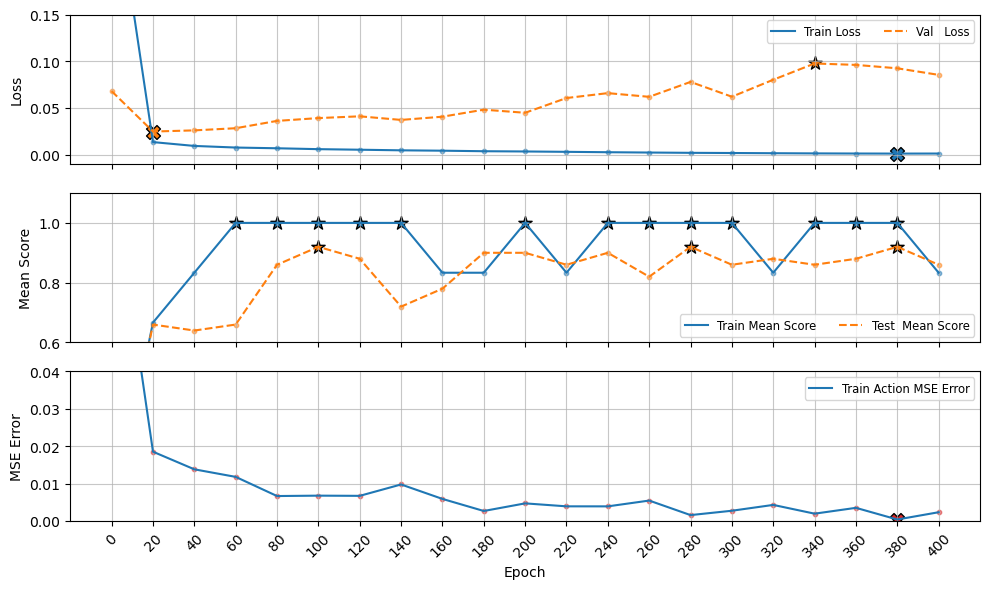

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Helper to highlight all extrema
def highlight_extrema(ax, x, y, color, name):
    x=np.array(x)
    y=np.array(y)
    y_max, y_min = y.max(), y.min()
    idxs_max = np.where(y == y_max)[0]
    idxs_min = np.where(y == y_min)[0]
    ax.scatter([x[i] for i in idxs_max], [y[i] for i in idxs_max],
               color=color, s=100, marker='*', edgecolor='k')
    ax.scatter([x[i] for i in idxs_min], [y[i] for i in idxs_min],
               color=color, s=100, marker='X', edgecolor='k')

# 1. Loss vs Epoch
axs[0].plot(epochs, train_loss, label='Train Loss', linestyle='-')
axs[0].plot(epochs, val_loss,   label='Val   Loss',   linestyle='--')
axs[0].scatter(epochs, train_loss, color='tab:blue',  s=10, alpha=0.5)
axs[0].scatter(epochs, val_loss,   color='tab:orange',s=10, alpha=0.5)
highlight_extrema(axs[0], epochs, train_loss, 'tab:blue',  'Train')
highlight_extrema(axs[0], epochs, val_loss,   'tab:orange','Val')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper right', fontsize='small', ncol=2)
axs[0].grid(alpha=0.7)
axs[0].set_ylim(-0.01, 0.15)

# 2. Mean Score vs Epoch
axs[1].plot(epochs, train_score, label='Train Mean Score', linestyle='-')
axs[1].plot(epochs, test_score,  label='Test  Mean Score',  linestyle='--')
axs[1].scatter(epochs, train_score, color='tab:blue',  s=10, alpha=0.5)
axs[1].scatter(epochs, test_score,  color='tab:orange',s=10, alpha=0.5)
highlight_extrema(axs[1], epochs, train_score, 'tab:blue',  'Train')
highlight_extrema(axs[1], epochs, test_score,  'tab:orange','Test')
axs[1].set_ylabel('Mean Score')
axs[1].legend(loc='lower right', fontsize='small', ncol=2)
axs[1].grid(alpha=0.7)
axs[1].set_ylim(0.6, 1.1)

# 3. Action MSE Error vs Epoch
axs[2].plot(epochs, action_mse, label='Train Action MSE Error', linestyle='-')
axs[2].scatter(epochs, action_mse, color='tab:red', s=10, alpha=0.5)
highlight_extrema(axs[2], epochs, action_mse, 'tab:red', 'MSE')
axs[2].set_ylabel('MSE Error')
axs[2].set_xlabel('Epoch')
axs[2].legend(loc='upper right', fontsize='small')
axs[2].grid(alpha=0.7)
axs[2].set_ylim(0, 0.04)

# Final formatting
plt.xticks(epochs, rotation=45)
plt.tight_layout()
plt.show()